In [1]:
import xarray as xr

In [2]:
ds = xr.open_dataset("datasets/wiwb8406881029522672451.nc")

In [3]:
ds

<xarray.Dataset> Size: 3MB
Dimensions:        (analysis_time: 1, x: 110, y: 109, time: 72)
Coordinates:
  * analysis_time  (analysis_time) datetime64[ns] 8B 1970-01-01
  * x              (x) float64 880B 351.5 352.5 353.5 ... 458.5 459.5 460.5
  * y              (y) float64 872B -4.005e+03 -4.006e+03 ... -4.113e+03
  * time           (time) datetime64[ns] 576B 2024-07-12T01:00:00 ... 2024-07-15
Data variables:
    crs            int32 4B ...
    P              (time, y, x) float32 3MB ...
Attributes:
    Conventions:           CF-1.6
    title:                 Data
    institution:           HydroLogic B.V.
    source:                HydroNET 4 Server
    history:               2025-07-23 09:33:38 UTC: exported from HydroNET 4 ...
    references:            http://www.hydrologic.com/
    Metadata_Conventions:  Unidata Dataset Discovery v1.0
    summary:               Data exported from HydroNET 4 Server
    date_created:          2025-07-23 09:33:38 UTC

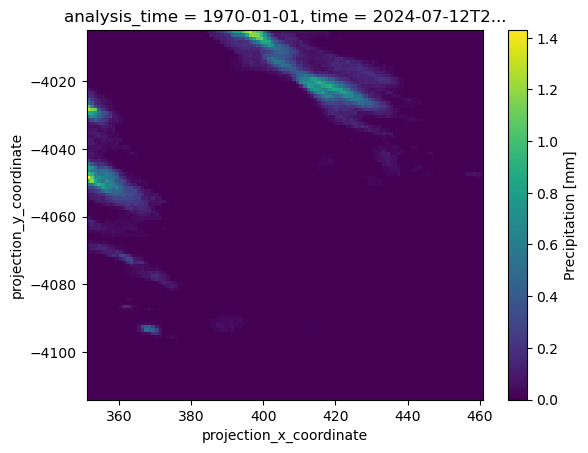

In [4]:
ax = ds.isel(analysis_time=0, time=20)['P'].plot()

In [4]:
ds.isel(analysis_time=0, time=20)

<xarray.Dataset> Size: 8kB
Dimensions:        (x: 50, y: 38)
Coordinates:
    analysis_time  datetime64[ns] 8B 2024-10-25T11:00:00
  * x              (x) float64 400B 5.133 5.162 5.191 5.22 ... 6.496 6.525 6.554
  * y              (y) float64 304B 52.56 52.55 52.53 52.51 ... 51.93 51.92 51.9
    time           datetime64[ns] 8B 2024-10-26T07:00:00
Data variables:
    crs            int32 4B ...
    APCP           (y, x) float32 8kB ...
Attributes:
    Conventions:           CF-1.6
    title:                 Data
    institution:           HydroLogic B.V.
    source:                HydroNET 4 Server
    history:               2024-10-25 14:08:09 UTC: exported from HydroNET 4 ...
    references:            http://www.hydrologic.com/
    Metadata_Conventions:  Unidata Dataset Discovery v1.0
    summary:               Data exported from HydroNET 4 Server
    date_created:          2024-10-25 14:08:09 UTC

In [13]:
convert_to_meters = 1000  # Adjust this value based on your dataset's coordinate system # Convert to meters if applicable

In [14]:
x = ds.isel(analysis_time=0, time=20,y=0)['x'].values
x_0 = x[0] * convert_to_meters
x_0

np.float64(351501.23024999996)

In [15]:
dx = abs(x[1] - x[0]) * convert_to_meters  
dx 

np.float64(1000.0034999999912)

In [16]:
y = ds.isel(analysis_time=0, time=20,x=0)['y'].values
y_0 = y[0] * convert_to_meters
y_0

np.float64(-4005483.7064)

In [17]:

dy = abs(y[1] - y[0]) * convert_to_meters
dy

np.float64(1000.0048000001698)

In [18]:
rows = len(y)
columns = len(x)

In [19]:
print(f'<regular locationId="WIWB-HARMONIE">\n\
		<rows>{rows}</rows>\n\
		<columns>{columns}</columns>\n\
		<geoDatum>WGS 1984</geoDatum>\n\
		<firstCellCenter>\n\
			<x>{x_0}</x>\n\
			<y>{y_0}</y>\n\
		</firstCellCenter>\n\
		<xCellSize>{dx}</xCellSize>\n\
		<yCellSize>{dy}</yCellSize>\n\
	</regular>')

<regular locationId="WIWB-HARMONIE">
		<rows>109</rows>
		<columns>110</columns>
		<geoDatum>WGS 1984</geoDatum>
		<firstCellCenter>
			<x>351501.23024999996</x>
			<y>-4005483.7064</y>
		</firstCellCenter>
		<xCellSize>1000.0034999999912</xCellSize>
		<yCellSize>1000.0048000001698</yCellSize>
	</regular>


In [ ]:
	# <regular locationId="VnV-Radar">
	# 	<rows>109</rows>
	# 	<columns>110</columns>
	# 	<polarStereographic>
	# 		<originLatitude>90</originLatitude>
	# 		<originLongitude>0</originLongitude>
	# 		<trueScalingLatitude>60</trueScalingLatitude>
	# 		<equatorRadius>6378137</equatorRadius>
	# 		<poleRadius>6356752</poleRadius>
	# 	</polarStereographic>
	# 	<firstCellCenter>
	# 		<x>351501.23025</x>
	# 		<y>-4005483.7112</y>
	# 		<z>0</z>
	# 	</firstCellCenter>
	# 	<xCellSize>1000</xCellSize>
	# 	<yCellSize>1000</yCellSize>
	# </regular>